In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [23]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [29]:
# 创建模拟数据
np.random.seed(100)

# 显示方式设置,每行的字符数用于插入换行符,是否使用科学计数法
np.set_printoptions(linewidth=1000,suppress=True)

N=10
x=np.linspace(0,6,N)
y=1.8*x**3+x**2-14*x-7+np.random.randn(N)


# 将其设置为矩阵
x.shape=-1,1
y.shape=-1,1

In [30]:
## RidgeCV和Ridge的区别:前者可以进行交叉验证
models=[
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',RidgeCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',LassoCV(alphas=np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures()),
        ('Linear',ElasticNetCV(alphas=np.logspace(-3,2,50),l1_ratio=[.1,.5,.7,.9,.95,1],fit_intercept=False))
    ])
]

1阶，系数为： [-85.38610965  52.35778198]
5阶，系数为： [-8.72487158 -8.5718437  -3.42248792  3.45126199 -0.29073318  0.01914321]
9阶，系数为： [  -8.7497655   -83.15010093  277.08969903 -405.08032224  309.61875967 -136.60035268   36.33471808   -5.74893759    0.49827026   -0.01820837]


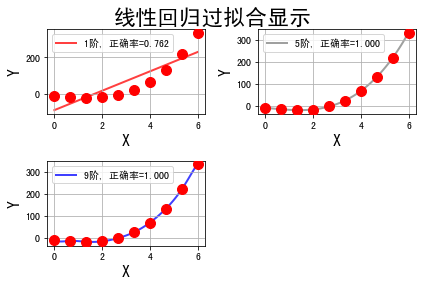

In [31]:
## 线性模型过拟合图形识别
plt.figure(facecolor='w')
degree = np.arange(1,N,4) # 阶
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    colors.append('#%06x' % int(c))

model = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)

    # 设置阶数
    model.set_params(Poly__degree=d)
    # 模型训练
    model.fit(x, y.ravel())
    
    lin = model.get_params('Linear')['Linear']
    output = u'%d阶，系数为：' % (d)
    print (output, lin.coef_.ravel())
    
    x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    
    z = N - 1 if (d == 2) else 0
    label = u'%d阶, 正确率=%.3f' % (d,s)
    plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)

plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'线性回归过拟合显示', fontsize=22)
plt.show()

线性回归:1阶，系数为： [-85.38610965  52.35778198]
线性回归:3阶，系数为： [ -8.54302449 -11.05959935  -0.07102558   1.90514527]
线性回归:5阶，系数为： [-8.72487158 -8.5718437  -3.42248792  3.45126199 -0.29073318  0.01914321]
线性回归:7阶，系数为： [ -8.76061017 -12.92427515  11.00097521 -12.77461249   8.13395745  -2.18771009   0.28320771  -0.01414493]
线性回归:9阶，系数为： [  -8.7497655   -83.15010093  277.08969903 -405.08032224  309.61875967 -136.60035268   36.33471808   -5.74893759    0.49827026   -0.01820837]
Ridge回归:1阶，系数为： [-66.14299072  47.53014776]
Ridge回归:3阶，系数为： [ -8.62372972 -10.73500294  -0.21081386   1.92015697]
Ridge回归:5阶，系数为： [-8.72079819 -7.51985002 -3.77755683  3.30427637 -0.22485363  0.01306232]
Ridge回归:7阶，系数为： [-8.85654148 -7.01993856 -3.07925492 -0.03927441  2.48837531 -0.87548243  0.12978255 -0.00702821]
Ridge回归:9阶，系数为： [-8.6905999  -5.39046703 -2.98997214 -0.79391333  0.95044632  1.10526702 -0.7523378   0.18405426 -0.02042432  0.00086775]
Lasso回归:1阶，系数为： [-33.81492122  39.19082211]
Lasso回归:3阶，系数为： [ -6.51550264 -

/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

Lasso回归:5阶，系数为： [ -7.0382326  -11.23081476   0.73415022   1.46242805   0.06393609  -0.00205543]
Lasso回归:7阶，系数为： [-0.         -0.         -1.42775116 -0.1458904   0.35562671  0.01932614 -0.00125781 -0.00048323]
Lasso回归:9阶，系数为： [-0.         -0.         -0.         -0.          0.00661969  0.06366405  0.00142569 -0.00018778 -0.00005464 -0.00000914]


/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.

ElasticNet:1阶，系数为： [-56.36640475  45.03893967]
ElasticNet:3阶，系数为： [ -6.52035682 -15.70100304   1.81880735   1.70460721]


/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py

ElasticNet:5阶，系数为： [-6.77615446 -9.15982211 -0.37222681  1.58707817  0.07614402 -0.00405745]


/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet:7阶，系数为： [-0.         -0.         -1.17571436 -0.25656566  0.36540533  0.02006175 -0.00126604 -0.00049438]


/Users/hushiwei/anaconda3/envs/AI/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet:9阶，系数为： [-0.         -0.         -0.         -0.          0.01028583  0.06269648  0.00143308 -0.00018411 -0.00005405 -0.0000091 ]


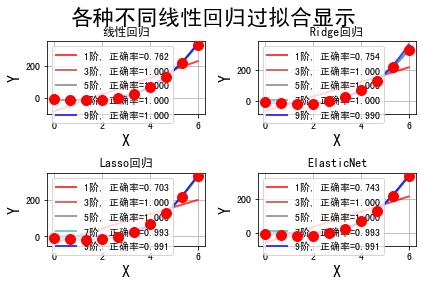

In [25]:
## 线性回归、Lasso回归、Ridge回归、ElasticNet比较
plt.figure(facecolor='w')
degree = np.arange(1,N, 2) # 阶
dm = degree.size
colors = [] # 颜色
for c in np.linspace(16711680, 255, dm):
    colors.append('#%06x' % int(c))
titles = [u'线性回归', u'Ridge回归', u'Lasso回归', u'ElasticNet']

for t in range(4):
    model = models[t]#选择了模型--具体的pipeline
    plt.subplot(2,2,t+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)

    for i,d in enumerate(degree):
        # 设置阶数(多项式)
        model.set_params(Poly__degree=d)
        # 模型训练
        model.fit(x, y)

        # 获取得到具体的算法模型
        lin = model.get_params()['Linear']
        # 打印数据
        output = '%s:%d阶，系数为：' % (titles[t],d)
        print (output, lin.coef_.ravel())

        # 产生模拟数据
        x_hat = np.linspace(x.min(), x.max(), num=100) ## 产生模拟数据
        x_hat.shape = -1,1
        # 数据预测
        y_hat = model.predict(x_hat)
        # 计算准确率
        s = model.score(x, y)
        label = u'%d阶, 正确率=%.3f' % (d,s)
        plt.plot(x_hat, y_hat, color=colors[i], lw=2, alpha=0.75, label=label)
    
    plt.legend(loc = 'upper left')
    plt.grid(True)
    plt.title(titles[t])
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
plt.tight_layout(1, rect=(0,0,1,0.95))
plt.suptitle(u'各种不同线性回归过拟合显示', fontsize=22)
plt.show()